# Classification

## Logistic Regression 

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")
from joblib import dump, load


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
np.random.seed = 72

### Load data

Tele-costumer-churn data-set. (you can download it from [here](https://www.kaggle.com/blastchar/telco-customer-churn))

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

> 1. Customers who left within the last month – the column is called Churn
> 2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> 3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> 4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [83]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
df["PhoneService"].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [84]:
df.shape

(7043, 21)

In [85]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

For some of the data points there is no `TotalCharges` value. We need to find these data points and remove them.

In [86]:
z = df["TotalCharges"].map(lambda x: x.replace('.', '', 1).isdigit())
df = df[z]

In [87]:
df.reset_index(inplace=True)
df.shape

(7032, 22)

In [88]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

### base rate
What is the base rate?

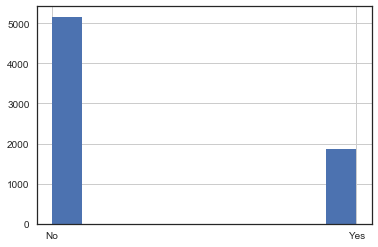

In [89]:
df["Churn"].hist()

In [90]:
# the accurcy if we predict for everyone no churn
print("base accuracy: ", len(df[df["Churn"] == 'No']) / len(df))

base accuracy:  0.7342150170648464


### Important! 

__For all the questions below, fix the seed of random generators to 72.__

### Training

Train a logistic regression on this data-set. Use these set of features: "tenure", "MonthlyCharges", "gender", "PhoneService", "TechSupport", "StreamingTV", "PaperlessBilling"

- what is the train accuracy?

- what is the test accuracy?

- How does adding the categorical features improve the accuracy?

- what is the precision and recall for the customers who churn? (churn = yes)

In [91]:
df["PaperlessBilling"].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [93]:
le = LabelEncoder()

In [94]:
# extracting numerial attributes
X = df[["tenure", "MonthlyCharges"]]
y = le.fit_transform(df["Churn"])

In [95]:
# extracting categorical attributes
one_hot = OneHotEncoder()
one_hot_features = one_hot.fit_transform(df[["gender", "PhoneService", "TechSupport", "StreamingTV", "PaperlessBilling"]])

In [96]:
# save one_hot encoder
dump(one_hot, "one_hot.joblib")

['one_hot.joblib']

In [97]:
one_hot_features = pd.DataFrame(one_hot_features.toarray())

In [98]:
X = pd.concat((X, one_hot_features), axis=1)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [100]:
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [101]:
LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [102]:
# best regularizer
LR.C_

array([21.5443469])

In [103]:
# train accuracy
LR.score(X_train, y_train)

0.7996444444444445

In [104]:
# test accuracy
LR.score(X_test, y_test)

0.7853589196872779

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LR.predict(X_test))

array([[940, 103],
       [199, 165]])

In [106]:
dump(LR, 'LR.joblib') 

['LR.joblib']

In [107]:
clf = load('LR.joblib')

In [108]:
clf.predict(np.array([2, 53.85,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]).reshape((1,-1)))

array([1])

In [109]:
from preprocess import preprocess


In [110]:
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
d = {"tenure": 23,
             "MonthlyCharges": 56.3, "gender": "Female", "PhoneService": "Yes", 
              "TechSupport": "Yes", "StreamingTV": "No", "PaperlessBilling": "Yes"}

In [112]:
sample = pd.DataFrame([d])

In [113]:
preprocess(sample)

,tenure,MonthlyCharges,0,1,2,3,4,5,6,7,8,9,10,11
0,23,56.3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [114]:
LR.predict(preprocess(sample))

array([0])

### precision-recall

- what are the precision and recall for calss label 1 ?


In [44]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
# precision
print("precision: ", precision_score(y_test, LR.predict(X_test)))
# recall
print("recall: ", recall_score(y_test, LR.predict(X_test)))

precision:  0.6156716417910447
recall:  0.4532967032967033
